In [478]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

In [479]:
data = pd.read_csv('H2HBABBA1533.csv')

In [480]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200895843,US,2019-09-09 00:00:00,2019.0,1.929776e+09,2019-08-22,20190822,20190822,20190906.0,USD,RV,1.0,NaN,41386.61,20190822.0,NAA8,1.929776e+09,0
1,U001,0200769623,WAL-MAR,2019-11-25 00:00:00,2019.0,1.930144e+09,2019-11-12,20191112,20191112,20191127.0,USD,RV,1.0,NaN,47178.82,20191112.0,NAH4,1.930144e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23 00:00:00,2019.0,1.929131e+09,2019-04-12,20190411,20190412,20190427.0,USD,RV,1.0,NaN,51389.52,20190412.0,NAH4,1.929131e+09,0
3,U001,0200769623,WAL-MAR co,2019-11-26 00:00:00,2019.0,1.930124e+09,2019-11-15,20191107,20191115,20191130.0,USD,RV,1.0,NaN,18177.18,20191115.0,NAH4,1.930124e+09,0
4,U001,0200769623,WAL-MAR,NaN,2020.0,1.930737e+09,2020-04-03,20200403,20200403,20200418.0,USD,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1


In [481]:
# checking for null values 
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

In [482]:
# checkin for majority of data
data["document type"].value_counts()

RV    49996
X2        4
Name: document type, dtype: int64

In [483]:
#since we are getting rv as 0.999 so it is of no use so we can delete it
data.drop('document type',axis = 1,inplace = True)

In [484]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200895843,US,2019-09-09 00:00:00,2019.0,1.929776e+09,2019-08-22,20190822,20190822,20190906.0,USD,1.0,NaN,41386.61,20190822.0,NAA8,1.929776e+09,0
1,U001,0200769623,WAL-MAR,2019-11-25 00:00:00,2019.0,1.930144e+09,2019-11-12,20191112,20191112,20191127.0,USD,1.0,NaN,47178.82,20191112.0,NAH4,1.930144e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23 00:00:00,2019.0,1.929131e+09,2019-04-12,20190411,20190412,20190427.0,USD,1.0,NaN,51389.52,20190412.0,NAH4,1.929131e+09,0
3,U001,0200769623,WAL-MAR co,2019-11-26 00:00:00,2019.0,1.930124e+09,2019-11-15,20191107,20191115,20191130.0,USD,1.0,NaN,18177.18,20191115.0,NAH4,1.930124e+09,0
4,U001,0200769623,WAL-MAR,NaN,2020.0,1.930737e+09,2020-04-03,20200403,20200403,20200418.0,USD,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1


In [485]:
#check for constant features
data.columns[data.nunique()<=1]

Index(['posting_id', 'area_business'], dtype='object')

In [486]:
# deletion of constant features 
data.drop(columns=['area_business','posting_id'],inplace=True)

In [487]:
#also we don't need invoice id in training so we can discard it
data.drop('invoice_id',axis =1,inplace =True)

In [488]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200895843,US,2019-09-09 00:00:00,2019.0,1.929776e+09,2019-08-22,20190822,20190822,20190906.0,USD,41386.61,20190822.0,NAA8,0
1,U001,0200769623,WAL-MAR,2019-11-25 00:00:00,2019.0,1.930144e+09,2019-11-12,20191112,20191112,20191127.0,USD,47178.82,20191112.0,NAH4,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23 00:00:00,2019.0,1.929131e+09,2019-04-12,20190411,20190412,20190427.0,USD,51389.52,20190412.0,NAH4,0
3,U001,0200769623,WAL-MAR co,2019-11-26 00:00:00,2019.0,1.930124e+09,2019-11-15,20191107,20191115,20191130.0,USD,18177.18,20191115.0,NAH4,0
4,U001,0200769623,WAL-MAR,NaN,2020.0,1.930737e+09,2020-04-03,20200403,20200403,20200418.0,USD,24079.57,20200403.0,NAH4,1


In [489]:
data.shape

(50000, 15)

In [490]:
data.duplicated().sum()

1212

In [491]:
data.drop_duplicates(keep =False,inplace = True)

In [492]:
data.duplicated().sum()

0

In [493]:
# Chech for deletion of duplicate features
data_t = data.T
data_t.head()

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
business_code,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,...,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001
cust_number,0200895843,0200769623,0200769623,0200769623,0200769623,0200704045,0200707005,0200705742,0200769623,0200782001,...,0200418007,0200711029,0200403651,0100028450,0200769623,0200769623,0200705742,0200794332,0200726979,0200763814
name_customer,US,WAL-MAR,WAL-MAR foundation,WAL-MAR co,WAL-MAR,RA,KING S foundation,DOT llc,WAL-MAR co,GORDO associates,...,AM systems,WEGMAN,Y H corp,DASA I llc,WAL-MAR systems,WAL-MAR llc,DOT corp,COST trust,BJ'S co,SYSCO F corporation
clear_date,2019-09-09 00:00:00,2019-11-25 00:00:00,2019-04-23 00:00:00,2019-11-26 00:00:00,NaN,NaN,2019-07-05 00:00:00,2019-05-02 00:00:00,2019-09-23 00:00:00,NaN,...,NaN,2019-03-27 00:00:00,2020-01-17 00:00:00,2019-10-01 00:00:00,2019-12-10 00:00:00,2019-12-30 00:00:00,2019-02-15 00:00:00,2019-08-22 00:00:00,2020-01-31 00:00:00,2019-09-23 00:00:00
buisness_year,2019.0,2019.0,2019.0,2019.0,2020.0,2020.0,2019.0,2019.0,2019.0,2020.0,...,2020.0,2019.0,2020.0,2019.0,2019.0,2019.0,2019.0,2019.0,2020.0,2019.0


In [494]:
data_t.duplicated().sum()

0

In [495]:
# a new list in created discarding the object datatype 
temp_data = data.drop(labels=['cust_number','business_code','name_customer','clear_date','posting_date','invoice_currency','cust_payment_terms'], axis=1)
temp_data.dtypes

buisness_year             float64
doc_id                    float64
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
total_open_amount         float64
baseline_create_date      float64
isOpen                      int64
dtype: object

In [496]:
temp_data.head()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,isOpen
0,2019.0,1.929776e+09,20190822,20190822,20190906.0,41386.61,20190822.0,0
1,2019.0,1.930144e+09,20191112,20191112,20191127.0,47178.82,20191112.0,0
2,2019.0,1.929131e+09,20190411,20190412,20190427.0,51389.52,20190412.0,0
3,2019.0,1.930124e+09,20191107,20191115,20191130.0,18177.18,20191115.0,0
4,2020.0,1.930737e+09,20200403,20200403,20200418.0,24079.57,20200403.0,1


In [497]:
#checking for quasi-constant if any there
from sklearn.feature_selection import VarianceThreshold
s = VarianceThreshold(
    threshold=0.01)

s.fit(temp_data)
sum(s.get_support())

8

In [498]:
#  print the quasi-constant features if Any 
print(
    len([
        x for x in temp_data.columns
        if x not in temp_data.columns[s.get_support()]
    ]))

[x for x in temp_data.columns if x not in temp_data.columns[s.get_support()]]

0


[]

In [499]:
temp_data.shape


(47602, 8)

In [500]:
#changing the datatype of some features to date-Time
data['clear_date'] = pd.to_datetime(data['clear_date'])
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format='%Y%m%d')
data['document_create_date.1'] = pd.to_datetime(data['document_create_date.1'], format='%Y%m%d')
data['posting_date'] = pd.to_datetime(data['posting_date']) 

data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date               int64
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date             float64
cust_payment_terms                object
isOpen                             int64
dtype: object

In [501]:
data[data['invoice_currency'] == 'CAD'].head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
25,CA02,0140104409,LOB trust,NaT,2020.0,2.960617e+09,2020-02-29,20200229,2020-02-29,2020-03-14,CAD,150136.21,20200304.0,CA10,1
36,CA02,0140104429,COSTCO co,2019-07-02,2019.0,2.960553e+09,2019-06-05,20190605,2019-06-05,2019-06-24,CAD,15993.34,20190614.0,CA10,0
37,CA02,0140106408,WAL-M foundation,NaT,2020.0,2.960623e+09,2020-03-21,20200321,2020-03-21,2020-03-31,CAD,4878.02,20200321.0,CA10,1
43,CA02,0140104423,METRO llc,NaT,2020.0,2.960630e+09,2020-04-20,20200420,2020-04-20,2020-05-01,CAD,162295.09,20200421.0,CA10,1
60,CA02,0140104429,COSTCO systems,NaT,2020.0,2.960617e+09,2020-02-27,20200227,2020-02-27,2020-03-09,CAD,12383.81,20200228.0,CA10,1


In [502]:
#CAD in converted into USD and all the values are stored in new column Total-open-Amount 
data['total_open_amount'] = np.where((data['invoice_currency'] == 'CAD') ,((data['total_open_amount'])*0.78),(data['total_open_amount']))

In [538]:
data['invoice_currency'] = 'USD'
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,invoice_currency
0,U001,0200895843,US,2019-09-09,2019.0,1.929776e+09,2019-08-22,20190822,2019-08-22,2019-09-06,41386.61,20190822.0,NAA8,0,USD
1,U001,0200769623,WAL-MAR,2019-11-25,2019.0,1.930144e+09,2019-11-12,20191112,2019-11-12,2019-11-27,47178.82,20191112.0,NAH4,0,USD
2,U001,0200769623,WAL-MAR foundation,2019-04-23,2019.0,1.929131e+09,2019-04-12,20190411,2019-04-12,2019-04-27,51389.52,20190412.0,NAH4,0,USD
3,U001,0200769623,WAL-MAR co,2019-11-26,2019.0,1.930124e+09,2019-11-15,20191107,2019-11-15,2019-11-30,18177.18,20191115.0,NAH4,0,USD
4,U001,0200769623,WAL-MAR,NaT,2020.0,1.930737e+09,2020-04-03,20200403,2020-04-03,2020-04-18,24079.57,20200403.0,NAH4,1,USD


In [504]:
data['invoice_currency'].unique()

array(['USD'], dtype=object)

In [505]:
#since the invoice_currency becomes a constant so it is of no use thus dropped
data.drop(columns=['invoice_currency'],inplace=True)


In [506]:
#A new data set is created based on 
main_train = data.loc[data['clear_date'].notnull()]
main_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200895843,US,2019-09-09,2019.0,1.929776e+09,2019-08-22,20190822,2019-08-22,2019-09-06,41386.61,20190822.0,NAA8,0
1,U001,0200769623,WAL-MAR,2019-11-25,2019.0,1.930144e+09,2019-11-12,20191112,2019-11-12,2019-11-27,47178.82,20191112.0,NAH4,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23,2019.0,1.929131e+09,2019-04-12,20190411,2019-04-12,2019-04-27,51389.52,20190412.0,NAH4,0
3,U001,0200769623,WAL-MAR co,2019-11-26,2019.0,1.930124e+09,2019-11-15,20191107,2019-11-15,2019-11-30,18177.18,20191115.0,NAH4,0
6,U001,0200707005,KING S foundation,2019-07-05,2019.0,1.929500e+09,2019-06-19,20190618,2019-06-19,2019-07-04,64532.95,20190619.0,NAA8,0


In [507]:
main_train.shape

(38188, 14)

In [539]:
#Where clear_date == null is putted into test dataframe
main_test = data.loc[data.clear_date.isnull()]
main_test.shape

(9414, 15)

In [509]:
#sort the train data according to document_create_date.1 as we can't train model based on future data
main_train.sort_values(['posting_date'],inplace=True)
main_train.reset_index(inplace=True,drop=True)
main_train.head()

<ipython-input-509-3aa307d4de29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_train.sort_values(['posting_date'],inplace=True)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928540e+09,2018-12-30,20181229,2018-12-30,2019-01-14,42.04,20181230.0,NAA8,0
1,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928538e+09,2018-12-30,20181229,2018-12-30,2019-01-14,5433.68,20181230.0,NAH4,0
2,U001,0200744019,TARG trust,2019-01-18,2019.0,1.928542e+09,2018-12-30,20181229,2018-12-30,2019-01-14,11982.59,20181230.0,NAA8,0
3,U001,0200744019,TARG foundation,2019-01-18,2019.0,1.928540e+09,2018-12-30,20181229,2018-12-30,2019-01-14,5878.67,20181230.0,NAA8,0
4,U001,0200779906,BOZZU us,2019-01-16,2019.0,1.928541e+09,2018-12-30,20181230,2018-12-30,2019-01-14,110569.17,20181230.0,NAA8,0


In [510]:
#train dat is splitted in 8:2 format 
from sklearn.model_selection import train_test_split
main_train_final, validat = train_test_split(main_train,test_size=.2,shuffle=False)
main_train_final.shape,validat.shape

((30550, 14), (7638, 14))

In [511]:
main_train_final['isOpen'].value_counts()

0    30550
Name: isOpen, dtype: int64

In [512]:
#20% validation data is splited 50% slab (in the sorted document_create_date.1)
validat_final,test_final = train_test_split(validat,test_size=.5,shuffle=False)
validat_final.shape,test_final.shape

((3819, 14), (3819, 14))

In [513]:
#DELAY is calculated by (clear_date-due_in_date)
main_train_final['DELAY']=main_train_final['clear_date'] - main_train_final['due_in_date']
main_train_final.head()

<ipython-input-513-6cd39be19f38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_train_final['DELAY']=main_train_final['clear_date'] - main_train_final['due_in_date']


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,DELAY
0,U001,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928540e+09,2018-12-30,20181229,2018-12-30,2019-01-14,42.04,20181230.0,NAA8,0,1 days
1,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928538e+09,2018-12-30,20181229,2018-12-30,2019-01-14,5433.68,20181230.0,NAH4,0,-5 days
2,U001,0200744019,TARG trust,2019-01-18,2019.0,1.928542e+09,2018-12-30,20181229,2018-12-30,2019-01-14,11982.59,20181230.0,NAA8,0,4 days
3,U001,0200744019,TARG foundation,2019-01-18,2019.0,1.928540e+09,2018-12-30,20181229,2018-12-30,2019-01-14,5878.67,20181230.0,NAA8,0,4 days
4,U001,0200779906,BOZZU us,2019-01-16,2019.0,1.928541e+09,2018-12-30,20181230,2018-12-30,2019-01-14,110569.17,20181230.0,NAA8,0,2 days


<AxesSubplot:>

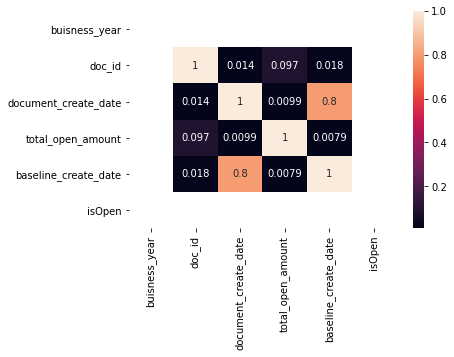

In [514]:

import seaborn as sns
cor = main_train_final.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)
 

In [515]:
#removing other corelated features
main_train_final.drop(columns=['document_create_date','baseline_create_date'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [516]:
main_train_final.shape

(30550, 13)

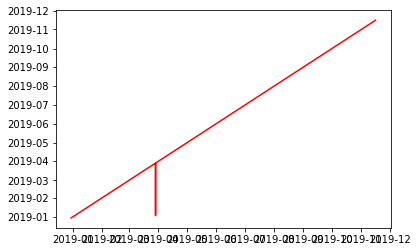

In [517]:

import matplotlib.pyplot as p
p.plot_date(main_train_final['posting_date'], main_train_final['document_create_date.1'],'r')
p.show()

In [518]:
#since 'posting_date' ,'document_create_date.1'  features data are almost same so we can ignore either of feature
main_train_final.drop(columns=['posting_date'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [519]:
main_train_final.shape


(30550, 12)

In [520]:
# month_quarter,month are calculated for further use in model prediction
main_train_final['document_create_date.1_month-in-quarter'] = main_train_final['document_create_date.1'].dt.quarter
main_train_final['document_create_date.-in-_month'] = main_train_final['document_create_date.1'].dt.month
main_train_final['due_in_date-in-month'] = main_train_final['due_in_date'].dt.month
main_train_final['due_in_date-in-year'] = main_train_final['due_in_date'].dt.year
main_train_final['due_in_date-in-days'] = main_train_final['due_in_date'].dt.day




main_train_final.head()

<ipython-input-520-8605a47b7bd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_train_final['document_create_date.1_month-in-quarter'] = main_train_final['document_create_date.1'].dt.quarter
<ipython-input-520-8605a47b7bd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_train_final['document_create_date.-in-_month'] = main_train_final['document_create_date.1'].dt.month
<ipython-input-520-8605a47b7bd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,isOpen,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-year,due_in_date-in-days
0,U001,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928540e+09,2018-12-30,2019-01-14,42.04,NAA8,0,1 days,4,12,1,2019,14
1,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928538e+09,2018-12-30,2019-01-14,5433.68,NAH4,0,-5 days,4,12,1,2019,14
2,U001,0200744019,TARG trust,2019-01-18,2019.0,1.928542e+09,2018-12-30,2019-01-14,11982.59,NAA8,0,4 days,4,12,1,2019,14
3,U001,0200744019,TARG foundation,2019-01-18,2019.0,1.928540e+09,2018-12-30,2019-01-14,5878.67,NAA8,0,4 days,4,12,1,2019,14
4,U001,0200779906,BOZZU us,2019-01-16,2019.0,1.928541e+09,2018-12-30,2019-01-14,110569.17,NAA8,0,2 days,4,12,1,2019,14


In [521]:
main_train_final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,isOpen,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-year,due_in_date-in-days
0,U001,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928540e+09,2018-12-30,2019-01-14,42.04,NAA8,0,1 days,4,12,1,2019,14
1,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928538e+09,2018-12-30,2019-01-14,5433.68,NAH4,0,-5 days,4,12,1,2019,14
2,U001,0200744019,TARG trust,2019-01-18,2019.0,1.928542e+09,2018-12-30,2019-01-14,11982.59,NAA8,0,4 days,4,12,1,2019,14
3,U001,0200744019,TARG foundation,2019-01-18,2019.0,1.928540e+09,2018-12-30,2019-01-14,5878.67,NAA8,0,4 days,4,12,1,2019,14
4,U001,0200779906,BOZZU us,2019-01-16,2019.0,1.928541e+09,2018-12-30,2019-01-14,110569.17,NAA8,0,2 days,4,12,1,2019,14


In [522]:
#clear_date and due-in date is deleted because delay is deriverd from those features and if we keep it then it will be a cheating
main_train_final.drop(columns=['clear_date','due_in_date'],inplace=True)
main_train_final['DELAY'] = main_train_final['DELAY'].dt.days
main_train_final.head()

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-522-eb64457c6c51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_train_final['DELAY'] = main_train_final['DELAY'].dt.days


,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,total_open_amount,cust_payment_terms,isOpen,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-year,due_in_date-in-days
0,U001,0200726979,BJ'S foundation,2019.0,1.928540e+09,2018-12-30,42.04,NAA8,0,1,4,12,1,2019,14
1,U001,0200769623,WAL-MAR systems,2019.0,1.928538e+09,2018-12-30,5433.68,NAH4,0,-5,4,12,1,2019,14
2,U001,0200744019,TARG trust,2019.0,1.928542e+09,2018-12-30,11982.59,NAA8,0,4,4,12,1,2019,14
3,U001,0200744019,TARG foundation,2019.0,1.928540e+09,2018-12-30,5878.67,NAA8,0,4,4,12,1,2019,14
4,U001,0200779906,BOZZU us,2019.0,1.928541e+09,2018-12-30,110569.17,NAA8,0,2,4,12,1,2019,14


In [523]:
main_train_final['total_open_amount'].head()


0        42.04
1      5433.68
2     11982.59
3      5878.67
4    110569.17
Name: total_open_amount, dtype: float64

In [524]:
# we don't need the cust_name  as cust id and cust_name are same and unique for training so dropped
main_train_final.drop(columns=['name_customer'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [525]:
main_train_final.shape

(30550, 14)

In [526]:
main_train_final.columns[main_train_final.nunique()<=1]

Index(['buisness_year', 'isOpen'], dtype='object')

In [527]:
main_train_final.drop(['isOpen','buisness_year'],axis=1,inplace= True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [528]:
main_train_final.head()

,business_code,cust_number,doc_id,document_create_date.1,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-year,due_in_date-in-days
0,U001,0200726979,1.928540e+09,2018-12-30,42.04,NAA8,1,4,12,1,2019,14
1,U001,0200769623,1.928538e+09,2018-12-30,5433.68,NAH4,-5,4,12,1,2019,14
2,U001,0200744019,1.928542e+09,2018-12-30,11982.59,NAA8,4,4,12,1,2019,14
3,U001,0200744019,1.928540e+09,2018-12-30,5878.67,NAA8,4,4,12,1,2019,14
4,U001,0200779906,1.928541e+09,2018-12-30,110569.17,NAA8,2,4,12,1,2019,14


In [529]:
# lablencoding is performed in business_code,cust_number and cust_payment_terms because they are catagorical column and can not passed into model
#since some fearutes are catagorical we have done label-encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
main_train_final.iloc[:,0] = labelencoder.fit_transform(main_train_final.iloc[:,0])
main_train_final.iloc[:,1] = labelencoder.fit_transform(main_train_final.iloc[:,1])
main_train_final.iloc[:,5] = labelencoder.fit_transform(main_train_final.iloc[:,5])

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [530]:
#since document_create_date.1 is a catogorical feature we can't use it in the model so dropped
main_train_final.drop(columns=['document_create_date.1'],inplace=True)

c:\users\telecom division\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [531]:
#since doc-id is a unique ids for the entitites we don't need it to train model so dropped
main_train_final.drop(columns=['doc_id'],inplace=True)

In [532]:
main_train_final.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-year,due_in_date-in-days
0,1,685,42.04,21,1,4,12,1,2019,14
1,1,782,5433.68,33,-5,4,12,1,2019,14
2,1,729,11982.59,21,4,4,12,1,2019,14
3,1,729,5878.67,21,4,4,12,1,2019,14
4,1,806,110569.17,21,2,4,12,1,2019,14


In [533]:
main_train_final.dtypes

business_code                                int32
cust_number                                  int32
total_open_amount                          float64
cust_payment_terms                           int32
DELAY                                        int64
document_create_date.1_month-in-quarter      int64
document_create_date.-in-_month              int64
due_in_date-in-month                         int64
due_in_date-in-year                          int64
due_in_date-in-days                          int64
dtype: object

In [534]:
main_train_final.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-year,due_in_date-in-days
0,1,685,42.04,21,1,4,12,1,2019,14
1,1,782,5433.68,33,-5,4,12,1,2019,14
2,1,729,11982.59,21,4,4,12,1,2019,14
3,1,729,5878.67,21,4,4,12,1,2019,14
4,1,806,110569.17,21,2,4,12,1,2019,14


In [535]:
main_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30550 entries, 0 to 30549
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   business_code                            30550 non-null  int32  
 1   cust_number                              30550 non-null  int32  
 2   total_open_amount                        30550 non-null  float64
 3   cust_payment_terms                       30550 non-null  int32  
 4   DELAY                                    30550 non-null  int64  
 5   document_create_date.1_month-in-quarter  30550 non-null  int64  
 6   document_create_date.-in-_month          30550 non-null  int64  
 7   due_in_date-in-month                     30550 non-null  int64  
 8   due_in_date-in-year                      30550 non-null  int64  
 9   due_in_date-in-days                      30550 non-null  int64  
dtypes: float64(1), int32(3), int64(6)
memory usage

In [536]:
pd.DataFrame(main_train_final).tail()

,business_code,cust_number,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month-in-quarter,document_create_date.-in-_month,due_in_date-in-month,due_in_date-in-year,due_in_date-in-days
30545,1,782,6532.60,33,-4,4,11,12,2019,1
30546,1,788,138718.96,21,1,4,11,12,2019,1
30547,1,782,18103.73,33,-5,4,11,12,2019,1
30548,1,646,54912.50,21,1,4,11,12,2019,1
30549,1,668,46882.08,21,1,4,11,12,2019,1


In [537]:
main_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30550 entries, 0 to 30549
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   business_code                            30550 non-null  int32  
 1   cust_number                              30550 non-null  int32  
 2   total_open_amount                        30550 non-null  float64
 3   cust_payment_terms                       30550 non-null  int32  
 4   DELAY                                    30550 non-null  int64  
 5   document_create_date.1_month-in-quarter  30550 non-null  int64  
 6   document_create_date.-in-_month          30550 non-null  int64  
 7   due_in_date-in-month                     30550 non-null  int64  
 8   due_in_date-in-year                      30550 non-null  int64  
 9   due_in_date-in-days                      30550 non-null  int64  
dtypes: float64(1), int32(3), int64(6)
memory usage